In [1]:
import numpy as np
import scipy.stats as stats
import statistics
import random
#from scipy import special
import matplotlib.pyplot as plt
#import SDDlib as sdd
#%matplotlib notebook
#import tqdm
#plt.rcParams['figure.figsize'] = [8, 8]

In [2]:
G = 6.67259 * 10**-8 #G in cgs

h = 6.63*10**(-27) #erg s 
c = 2.99*10**(10) #cm s^-1
m_p = 1.67262192 * 10**(-24) #g
kb = 1.38 * 10**(-16) #erg/K
E_ion_hydrogen = 13.6 * 1.60218e-12
#E_Ly_alpha = 10.2 * 1.60218e-12
#E_Ly_beta = 12.1 * 1.60218e-12

M_sun = 1.9891 * 10**33 #solar mass in g
R_sun = 6.9598 * 10**10 #solar radius in cm 
T_sun_eff = 5772 #Sun surface temperature in K
M_earth = 5.976 * 10**27 #earth mass in g
R_earth = 6.378 * 10**8 #earth radius in cm
ly = 9.463 * 10**17 #light year in cm
parsec = 3.086 * 10**18 #parsec in cm
AU = 1.496 * 10**13 #astronomical unit in cm

Gyr = 3.1536*10**16

In [3]:
frequency = np.linspace(0, 10**18, 1000000)
wavelenght = np.linspace(10**-6, 10**-2, 1000000)

#black body brightness 

def black_body_wavelenght(T):
    return (2 * h * c**2 / wavelenght**5)/(np.exp(h*c/(wavelenght*kb*T))-1)

def black_body_frequency(T):
    return (2 * h * frequency**3 / c**2)/(np.exp(h*frequency/(kb*T))-1)


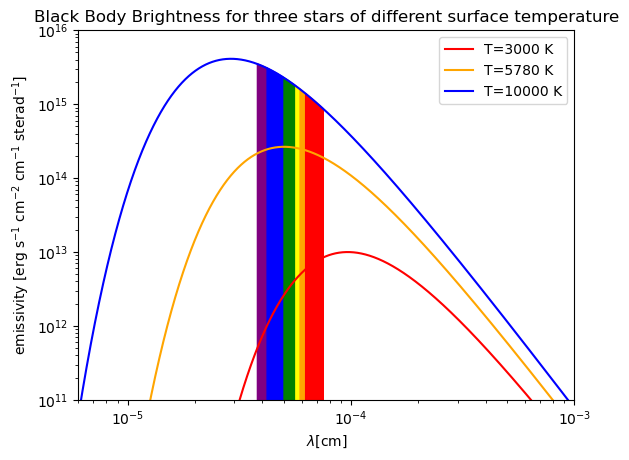

In [4]:
plt.plot(wavelenght, black_body_wavelenght(3000), label="T=3000 K", color = "red")
plt.plot(wavelenght, black_body_wavelenght(5780), label="T=5780 K", color = "orange")
plt.plot(wavelenght, black_body_wavelenght(10000), label="T=10000 K", color = "blue")
#plt.plot(wavelenght, black_body_wavelenght(3000), label="T=3000 K")
#plt.plot(wavelenght, black_body_wavelenght(10000), label="T=60000 K")
#plt.plot(wavelenght, black_body_wavelenght(10**4), label="T=10^4 K")
#plt.plot(v, bbody(10**5), label="T=10^5 K")
#plt.plot(v, bbody(10**6), label="T=10^6 K")
#plt.plot(v, bbody(10**7), label="T=10^7 K")

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\lambda$[cm]")
plt.ylabel("emissivity [erg s$^{-1}$ cm$^{-2}$ cm$^{-1}$ sterad$^{-1}$]")
plt.xlim(6*10**(-6), 10**(-3))
plt.ylim(10**(11), 10**(16))
plt.title("Black Body Brightness for three stars of different surface temperature")
plt.legend()

plt.fill_between(wavelenght,black_body_wavelenght(10000), where= (380*10**-7 < wavelenght)&(wavelenght < 420*10**-7), color= "purple")
plt.fill_between(wavelenght,black_body_wavelenght(10000), where= (420*10**-7 < wavelenght)&(wavelenght < 500*10**-7), color= "blue")
plt.fill_between(wavelenght,black_body_wavelenght(10000), where= (500*10**-7 < wavelenght)&(wavelenght < 565*10**-7), color= "green")
plt.fill_between(wavelenght,black_body_wavelenght(10000), where= (565*10**-7 < wavelenght)&(wavelenght < 590*10**-7), color= "yellow")
plt.fill_between(wavelenght,black_body_wavelenght(10000), where= (590*10**-7 < wavelenght)&(wavelenght < 625*10**-7), color= "orange")
plt.fill_between(wavelenght,black_body_wavelenght(10000), where= (625*10**-7 < wavelenght)&(wavelenght < 750*10**-7), color= "red")

plt.show()

Effettivamente il colore di una stella dipende

$$F_\nu^{surface} =\frac{dE}{dt dA d\lambda} = \pi B_\nu(T)$$

$$L_\nu =\frac{dE}{dt d\lambda} = 4\pi^2 R^2 B_\nu(T)$$

$$F^{surface} = \frac{dE}{dt dA} = \sigma T^4$$

$$L = \frac{dE}{dt} = 4\pi R^2 \sigma T^4$$

$$F^{earth} = \frac{dE}{dt dA} = \frac{4\pi R^2 \sigma T^4}{4\pi d^2} = \frac{R^2 \sigma T^4}{d^2}$$


MAIN SEQUENCE stars surface temperature and radius depend only on the mass: 

$$L\propto M^3$$

$$L^{1-\frac{2(n-1)}{3(n+3)}}\propto T_{eff}^4$$

$$T_{eff}=T_\odot\left(\frac{M}{M_\odot}\right)^{\frac{n+11}{4n+12}}$$

$$R=R_\odot \left(\frac{M}{M_\odot}\right)^{\frac{n-1}{n+3}}$$

For pp-chain stars (n=4):

$$T_{eff}=T_\odot\left(\frac{M}{M_\odot}\right)^{\frac{15}{28}}$$

$$R=R_\odot \left(\frac{M}{M_\odot}\right)^{\frac{3}{7}}$$







In [4]:
#M expressed in solar mass
def pp_chain_star_continuum(M):
    return 4*np.pi**2 * (R_sun*M**(3/7))**2 * (2 * h * c**2 / wavelenght**5)/(np.exp(h*c/(wavelenght*kb*(T_sun_eff*M**(15/28))))-1)

/tmp/ipykernel_44867/3135728775.py:3: RuntimeWarning: overflow encountered in exp
  return 4*np.pi**2 * (R_sun*M**(3/7))**2 * (2 * h * c**2 / wavelenght**5)/(np.exp(h*c/(wavelenght*kb*(T_sun_eff*M**(15/28))))-1)
/tmp/ipykernel_44867/1527612839.py:2: RuntimeWarning: divide by zero encountered in log
  plt.plot(wavelenght, np.log(pp_chain_star_continuum(1)), label="1 M$_\odot$")
/tmp/ipykernel_44867/1527612839.py:3: RuntimeWarning: divide by zero encountered in log
  plt.plot(wavelenght, np.log(pp_chain_star_continuum(2)), label="2 M$_\odot$")
/tmp/ipykernel_44867/1527612839.py:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(wavelenght, np.log(pp_chain_star_continuum(10)), label="10 M$_\odot$")


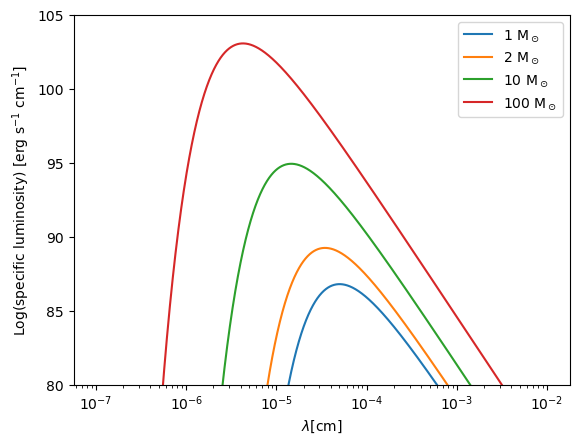

In [5]:
wavelenght = np.linspace(10**-7, 10**-2, 1000000)
plt.plot(wavelenght, np.log(pp_chain_star_continuum(1)), label="1 M$_\odot$")
plt.plot(wavelenght, np.log(pp_chain_star_continuum(2)), label="2 M$_\odot$")
plt.plot(wavelenght, np.log(pp_chain_star_continuum(10)), label="10 M$_\odot$")
plt.plot(wavelenght, np.log(pp_chain_star_continuum(100)), label="100 M$_\odot$")

plt.xscale("log")
plt.ylim(80,105)
plt.xlabel("$\lambda$[cm]")
plt.ylabel("Log(specific luminosity) [erg s$^{-1}$ cm$^{-1}$]")
plt.legend()


#plt.fill(565*10**-7, 590*10**-7, color= "yellow", alpha= "0.2")
#plt.fill_between(wavelenght,black_body_wavelenght(10000), where= (590*10**-7 < wavelenght)&(wavelenght < 625*10**-7), color= "orange")
#plt.fill_between(wavelenght,black_body_wavelenght(10000), where= (625*10**-7 < wavelenght)&(wavelenght < 750*10**-7), color= "red")

plt.show()

**SALPETER INITIAL MASS FUNCTION**

Assumptions:
    only MS pp-chain stars
    Single stellar population: all stars born at same age. 
    Salpeter initial mass function:

$$p(M) = \frac{1}{\int_{0.1}^{200}M^{-2.35}dM}M^{-2.35}$$    

In [6]:
#Salpeter with hit or miss method. Works for SMALL NUMBER OF STARS as well, differently from the analytical approach
#M expressed in solar mass
def Salpeter_rejectionSampling(N): 
    distribution_of_mass = []
    while len(distribution_of_mass )<N:
        M = random.uniform(0.1,100)
        n = random.uniform(0, 0.1**-2.35)
        if n<=M**-2.35:
            distribution_of_mass.append(M)
    return distribution_of_mass 

mysample = Salpeter_rejectionSampling(10) #very slow

print("Maximum stellar mass in the population is: ", max(mysample))
print("Average stellar mass in the population is: ", np.mean(mysample))
print("Modal stellar mass in the population is: ", stats.mode(mysample))
print("Median stellar mass in the population is: ", statistics.median(mysample))

plt.hist(my_sample,10)
plt.xscale("log")
plt.yscale("log")
plt.show()

Maximum stellar mass in the population is:  0.972594263127033
Average stellar mass in the population is:  0.37579223049515387
Modal stellar mass in the population is:  ModeResult(mode=0.11848689370869656, count=1)
Median stellar mass in the population is:  0.22660303021786157


NameError: name 'my_sample' is not defined

Maximum stellar mass in the population is:  5.505650751326921
Average stellar mass in the population is:  0.35903190741860014
Modal stellar mass in the population is:  ModeResult(mode=0.1022180061518796, count=1)
Median stellar mass in the population is:  0.17770626649348376


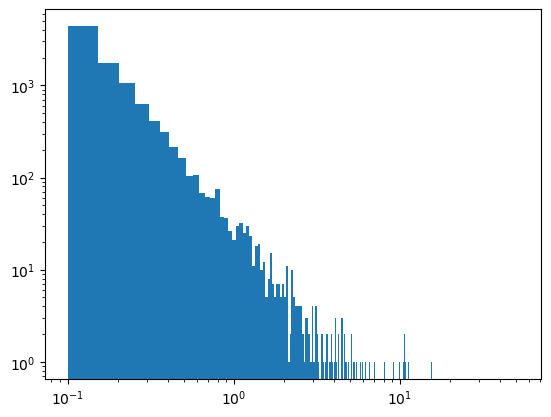

In [55]:
#Accept and reject is very little efficient for generating a sample with Salpeter distribution. The vast majority of the points are rejected, because the distibution falls very quickly!
#INVERSE TRANSFORM SAMPLING

#h(M) = M**-2.35 #must be normalized
#H(M) = int_0.1^200 h(M) = 1

norm = -(200**-1.35-0.1**-1.35)/1.35 #h(M) is devided by this number

def Salpeter_inverseSampling(N): 
    u = np.random.uniform(0,1,N)
    distribution_of_mass = np.abs(-u*(1.35*norm)+0.1**-1.35)**(-1/1.35)
    return distribution_of_mass

mysample = Salpeter_inverseSampling(100)

print("Maximum stellar mass in the population is: ", max(mysample))
print("Average stellar mass in the population is: ", np.mean(mysample))
print("Modal stellar mass in the population is: ", stats.mode(mysample))
print("Median stellar mass in the population is: ", statistics.median(mysample))

plt.hist(my_sample,1000)
plt.xscale("log")
plt.yscale("log")
plt.show()

**STAR LIFETIME AND GALAXY SPECTRUM**


Stars have finite lifetime: $\tau\propto M^{-2}$.

In [76]:
#age of a star (time spent on MS)
#M expressed in solar mass
f=0.1
eta=0.007
sun_lifetime=f*eta*10**20 #s
def star_lifetime(M): 
    return sun_lifetime/M**2 #s

mysample = Salpeter_inverseSampling(10000)
wavelenght = np.linspace(10**-5, 10**-4, 1000)

def GalaxySpectrum(age):
    galaxy_spectrum = wavelenght*0 
    for M in mysample: 
        if star_lifetime(M) > age:
            galaxy_spectrum = galaxy_spectrum + pp_chain_star_continuum(M)
    return galaxy_spectrum    

0.1 Gyr is lifetime of stars of  4.711353774514838  solar masses.


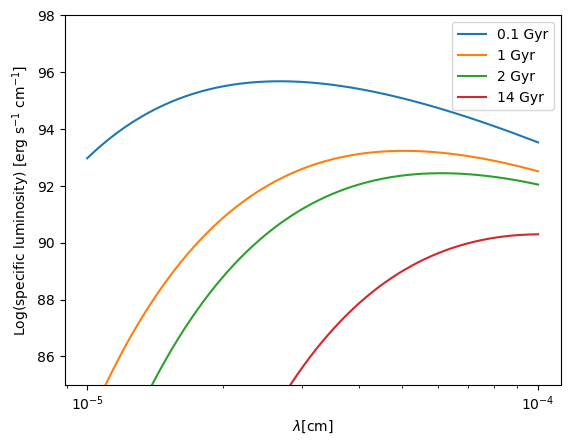

In [78]:
print("0.1 Gyr is lifetime of stars of ", np.sqrt(sun_lifetime/(0.1*Gyr)), " solar masses.")

plt.plot(wavelenght, np.log(GalaxySpectrum(0.1*Gyr)), label="0.1 Gyr")
plt.plot(wavelenght, np.log(GalaxySpectrum(Gyr)), label="1 Gyr")
plt.plot(wavelenght, np.log(GalaxySpectrum(2*Gyr)), label="2 Gyr")
plt.plot(wavelenght, np.log(GalaxySpectrum(14*Gyr)), label="14 Gyr")

plt.xscale("log")
plt.ylim(85,98)
plt.xlabel("$\lambda$[cm]")
plt.ylabel("Log(specific luminosity) [erg s$^{-1}$ cm$^{-1}$]")
plt.legend()
plt.show()

**DUST EXTINCTION**

Adding the effect of dust

In [87]:
wavelenght = np.linspace(10**-5, 10**-4, 1000)

def dust_att_k(wavelenght):
    wav_um = wavelenght/(10**-4) #wavelenght expressed in microns
    k1 = 2.659*(-2.156+1.509/wav_um-0.198/(wav_um**2)+0.011/(wav_um**3))+4.05
    k2 = 2.659*(-1.857+1.040/wav_um)+4.03 # 4.03 instead of 4.05 avoids sudden jump at 0.63um
    k = np.where(wav_um<=0.63, k1, k2)
    return k

mysample = Salpeter_inverseSampling(10000)
def GalaxySpectrum(age, dust_extinction): #dust extinction is E(B-V)
    galaxy_spectrum = wavelenght*0 
    for M in mysample: 
        if star_lifetime(M) > age:
            galaxy_spectrum = galaxy_spectrum + pp_chain_star_continuum(M)
    return galaxy_spectrum*10**(-0.4*dust_att_k(wavelenght)*dust_extinction)    

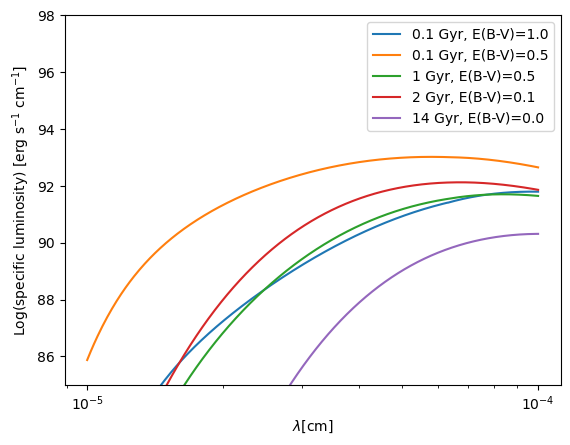

In [89]:
plt.plot(wavelenght, np.log(GalaxySpectrum(0.1*Gyr,1.0)), label="0.1 Gyr, E(B-V)=1.0")
plt.plot(wavelenght, np.log(GalaxySpectrum(0.1*Gyr,0.5)), label="0.1 Gyr, E(B-V)=0.5")
plt.plot(wavelenght, np.log(GalaxySpectrum(Gyr,0.5)), label="1 Gyr, E(B-V)=0.5")
plt.plot(wavelenght, np.log(GalaxySpectrum(2*Gyr,0.1)), label="2 Gyr, E(B-V)=0.1")
plt.plot(wavelenght, np.log(GalaxySpectrum(14*Gyr,0.)), label="14 Gyr, E(B-V)=0.0")

plt.xscale("log")
plt.ylim(85,98)
plt.xlabel("$\lambda$[cm]")
plt.ylabel("Log(specific luminosity) [erg s$^{-1}$ cm$^{-1}$]")
plt.legend()
plt.show()

In [12]:
from astropy.io import fits 
from pcigale.sed import SED
from pcigale.sed import utils
from pcigale.sed_modules import get_module

In [8]:
def generate_model (AGE, EBmV, TAU=1e-10) :
    
    # Initialisation of a new galaxy / SED
    galaxy = SED ()
    
    # Get the CIGALE SED generation modules, i.e. SFH module, SPS module and DUST module.
    sfh_module = get_module(
        'sfh2exp',
        tau_main=TAU,
        tau_burst = 1,
        burst_age = 1,
        age=AGE, 
        f_burst=0,
        normalise=True ) # Normalise the SFH to produce one solar mass.

    sps_module = get_module('bc03', imf=1, metallicity=0.02)
    
    dust_module = get_module('dustatt_calzleit', E_BVs_young = EBmV/0.44, E_BVs_old_factor = 0.44)
    
    # We process the SED object with all the modules in the right order.
    sfh_module.process(galaxy)
    sps_module.process(galaxy)
    dust_module.process(galaxy)
    modwave = galaxy.wavelength_grid*10 #Convert nm to A
    
    #This is the LUMINOSITY density from the stellar components in W/nm
    stellar_lum = galaxy.luminosities['stellar.young']+galaxy.luminosities['stellar.old']
    #This is the FLUX density from the stellar components in W/m2/nm at 10 parsec, here needs dista
    #Convert into cgs units (erg/cm2/s/A). x1000 for w/m2 to erg/cm2/s and x0.1 for nm to A = facto
    stellar_flux = utils.luminosity_to_flux(stellar_lum, 10. * 3.0865E16)*100
    
    #Repeat for the attenuated SED
    stellar_lum_att = np. copy (stellar_lum)
    stellar_lum_att += galaxy.luminosities["attenuation.stellar.young"]+galaxy.luminosities ["attenuation.stellar.old"]
    stellar_flux_att = utils.luminosity_to_flux(stellar_lum_att, 10. * 3.0865E16)*100
    
    return modwave, stellar_flux, stellar_flux_att
    

In [9]:
AGE = 1000 #Myr
EBmV = 0.4

modwave, stellar_flux, stellar_flux_att = generate_model (AGE, EBmV, TAU=1e-10)

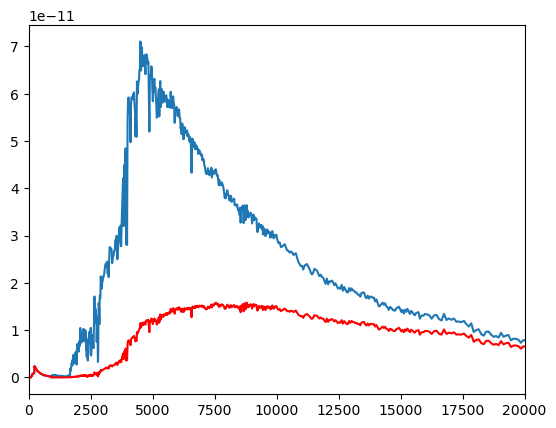

In [16]:
plt.plot(modwave, stellar_flux)
plt.plot(modwave, stellar_flux_att, color="red")
#plt.yscale("log")
plt.xlim(0,20000)
plt.show()

In [17]:
#Now Read one of the SDSS spectra
hdu = fits.open('SDSS_spec_G3.fits')
spflux = hdu[0].data
spwave = hdu[0].header['CRVAL1']+np.arange(hdu[0].header['NAXIS1'])*hdu[0].header['CDELT1']
z = hdu[0].header ['REDSHIFT']

In [19]:
#galaxies G1, G2 and G3 are in the Hubble flow!

H0 = 2.176*10**(-18) #Hz
c = 2.9979 * 10**10
Mpc = 3.086 * 10**24

distance = z * c / H0
print(distance)
print(distance/Mpc)

scale_fact = (10 / ( (distance/Mpc) *10**6))**2
print(scale_fact)

3.223844669117647e+26
104.46677476077923
9.163125323516336e-15


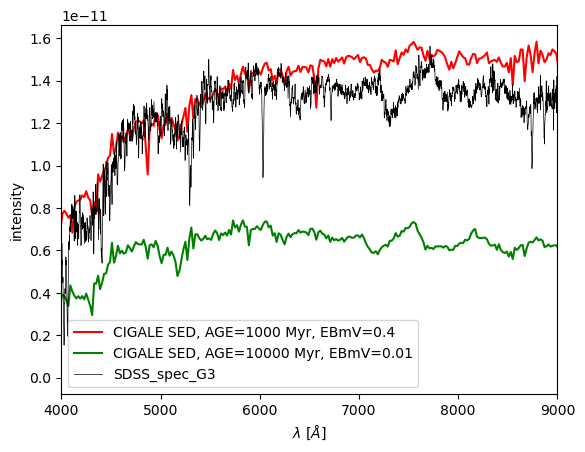

In [44]:
modwave_1, stellar_flux_1, stellar_flux_att_1 = generate_model (1000, 0.4, TAU=1e-10) #1000 Myr and 0.4 EBmV
modwave_2, stellar_flux_2, stellar_flux_att_2 = generate_model (10000, 0.01, TAU=1e-10)


mass_1 = 15 * 10**17 #??
mass_2 = 1.6 * 10**10 #??

plt.plot(modwave, stellar_flux_att, color="red", label="CIGALE SED, AGE=1000 Myr, EBmV=0.4")
plt.plot(modwave_2, stellar_flux_att_2, color="green", label="CIGALE SED, AGE=10000 Myr, EBmV=0.01")
plt.xlim(4000,9000)
plt.plot(spwave, spflux * 10**(-17) * scale_fact * mass_1, color="black", linewidth=0.5, label="SDSS_spec_G3")

plt.xlabel("$\lambda$ [$\AA$]")
plt.ylabel("intensity")
plt.legend()
plt.show()

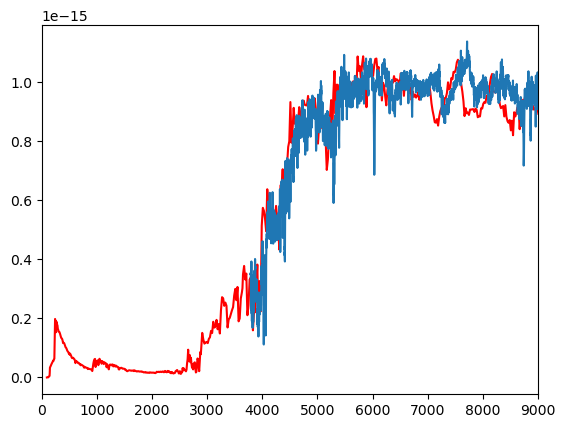

In [21]:
AGE = 10000 #Myr
EBmV = 0.01

modwave, stellar_flux, stellar_flux_att = generate_model (AGE, EBmV, TAU=1e-10)

mass = 1.6 * 10**10

plt.plot(modwave, stellar_flux_att* scale_fact * mass , color="red")
#plt.yscale("log")
plt.xlim(0,9000)

plt.plot(spwave, spflux * 10**(-17))

plt.show()

In [22]:
#Now Read one of the SDSS spectra
hdu = fits.open('SDSS_spec_G2.fits')
spflux = hdu[0].data
spwave = hdu[0].header['CRVAL1']+np.arange(hdu[0].header['NAXIS1'])*hdu[0].header['CDELT1']
z = hdu[0].header ['REDSHIFT']

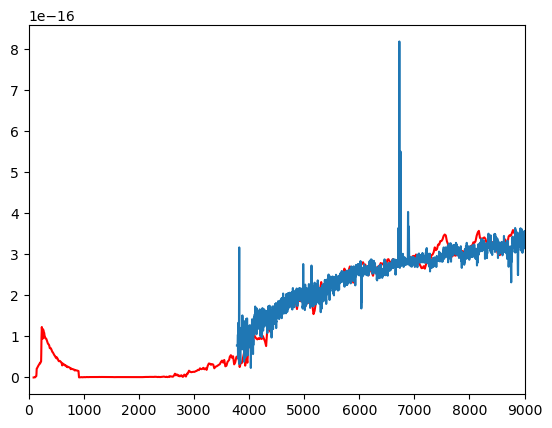

In [23]:
AGE = 9000 #Myr
EBmV = 0.3

modwave, stellar_flux, stellar_flux_att = generate_model (AGE, EBmV, TAU=1e-10)

mass = 1 * 10**10

plt.plot(modwave, stellar_flux_att* scale_fact * mass , color="red")
#plt.yscale("log")
plt.xlim(0,9000)

plt.plot(spwave, spflux * 10**(-17))

plt.show()

In [24]:
#Now Read one of the SDSS spectra
hdu = fits.open('SDSS_spec_G3.fits')
spflux = hdu[0].data
spwave = hdu[0].header['CRVAL1']+np.arange(hdu[0].header['NAXIS1'])*hdu[0].header['CDELT1']
z = hdu[0].header ['REDSHIFT']

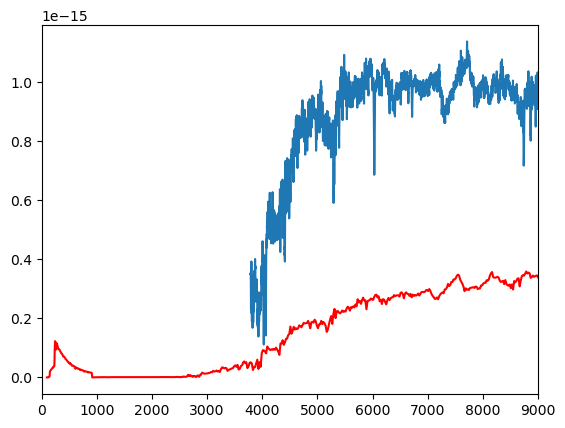

In [25]:
AGE = 9000 #Myr
EBmV = 0.3

modwave, stellar_flux, stellar_flux_att = generate_model (AGE, EBmV, TAU=1e-10)

mass = 1 * 10**10

plt.plot(modwave, stellar_flux_att* scale_fact * mass , color="red")
#plt.yscale("log")
plt.xlim(0,9000)

plt.plot(spwave, spflux * 10**(-17))

plt.show()